In [1]:
import pandas as pd
import numpy as np

In [8]:
itemLoc = "C:\\Users\\sando\\Downloads\\items.csv"
itemDf = pd.read_csv(itemLoc)
itemDf.head(10)

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...
5,21,accessories-stand,Accessories Stand,Furniture,True,375.0,bells,1500.0,bells,Nook's Cranny,False,NaN,NaN,nh,item-accessories-stand,https://villagerdb.com/images/items/thumb/acce...
6,23,acid-washed-jacket,Acid-washed Jacket,Tops,True,420.0,bells,1680.0,bells,Able Sisters,NaN,NaN,NaN,nh,item-acid-washed-jacket,https://villagerdb.com/images/items/full/acid-...
7,24,acid-washed-jeans,Acid-washed Jeans,Bottoms,True,330.0,bells,1320.0,bells,Able Sisters,NaN,NaN,NaN,nh,item-acid-washed-jeans,https://villagerdb.com/images/items/full/acid-...
8,26,acnh-nintendo-switch,Acnh Nintendo Switch,Furniture,True,8990.0,bells,35960.0,bells,Receive in mail if playing on ACNH Switch,False,NaN,NaN,nh,item-acnh-nintendo-switch,https://villagerdb.com/images/items/thumb/acnh...
9,26,acnh-nintendo-switch,Acnh Nintendo Switch,Furniture,True,8990.0,bells,35960.0,bells,Nook Shopping,False,NaN,NaN,nh,item-acnh-nintendo-switch,https://villagerdb.com/images/items/thumb/acnh...


In [9]:
%%capture
! pip install seaborn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [12]:
print(itemDf.dtypes)

num_id             int64
id                object
name              object
category          object
orderable         object
sell_value       float64
sell_currency     object
buy_value        float64
buy_currency      object
sources           object
customizable      object
recipe           float64
recipe_id         object
games_id          object
id_full           object
image_url         object
dtype: object


Show correlation between columns. In end want to find relationship between item category, sell value and buy value
Other things to look at: item sources on price and

In [13]:
itemDf.corr()

,num_id,sell_value,buy_value,recipe
num_id,1.000000,0.007743,-0.000699,0.127881
sell_value,0.007743,1.000000,0.999586,0.328909
buy_value,-0.000699,0.999586,1.000000,0.182042
recipe,0.127881,0.328909,0.182042,1.000000


(0, 314999.51669426047)

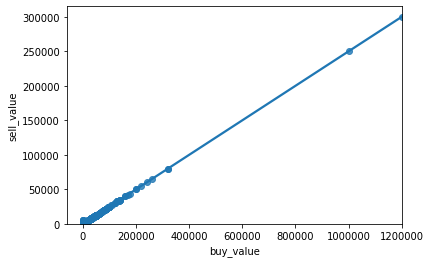

In [16]:
sns.regplot(x="buy_value", y="sell_value", data=itemDf)
plt.ylim(0,)

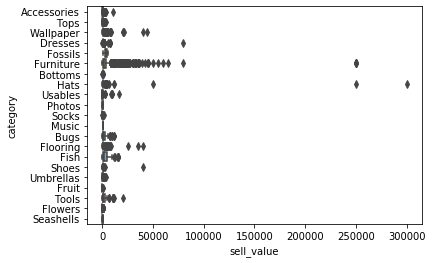

In [29]:
sns.boxplot(x="sell_value", y="category", data=itemDf)


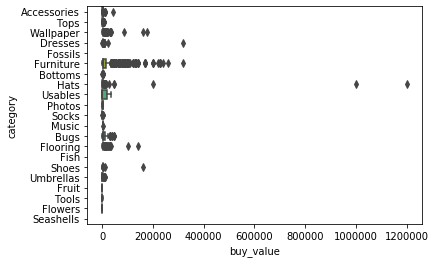

In [33]:
sns.boxplot(x="buy_value", y="category", data=itemDf)

Can see not much correlation between item category and value

In [30]:

itemDf.describe(include=['object'])

,id,name,category,orderable,sell_currency,buy_currency,sources,customizable,recipe_id,games_id,id_full,image_url
count,4565,4565,4565,1790,4529,3551,902,573,588,4565,3037,3037
unique,4200,4200,21,2,1,2,125,2,102,1,2704,2672
top,bunny-day-wreath,Bunny Day Rug,Furniture,False,bells,bells,Nook's Cranny,False,wood,nh,item-bunny-day-bag,https://villagerdb.com/images/image-not-availa...
freq,6,6,1264,976,4529,3536,329,316,67,4565,6,36


In [31]:
itemDf.describe()

,num_id,sell_value,buy_value,recipe
count,4565.000000,4529.000000,3.551000e+03,588.000000
mean,3661.618839,2261.378229,6.959650e+03,4.710884
std,2187.950090,11313.225932,3.432609e+04,6.494507
min,12.000000,5.000000,4.000000e+01,1.000000
25%,1722.000000,240.000000,8.700000e+02,2.000000
50%,3569.000000,390.000000,1.300000e+03,3.000000
75%,5607.000000,1000.000000,2.700000e+03,6.000000
max,7443.000000,300000.000000,1.200000e+06,90.000000


In [32]:
itemDf['category'].value_counts()

Furniture      1264
Photos          840
Flooring        324
Tops            289
Wallpaper       255
Dresses         239
Hats            230
Bottoms         142
Accessories     123
Flowers         109
Fish            101
Music            95
Shoes            89
Usables          88
Bugs             80
Fossils          76
Tools            74
Umbrellas        67
Socks            60
Fruit            12
Seashells         8
Name: category, dtype: int64

In [37]:
df_value_group = itemDf[['category','buy_value', 'sell_value']]
df_sell_group = itemDf[['category','sell_value']]

In [38]:
df_value_group = df_value_group.groupby(['category'],as_index=False).mean()

df_value_group


,category,buy_value,sell_value
0,Accessories,1911.754386,637.284553
1,Bottoms,1197.943262,298.345070
2,Bugs,10510.877193,2220.500000
3,Dresses,3803.788546,1114.058577
4,Fish,NaN,3808.811881
5,Flooring,3833.393333,1275.447205
6,Flowers,160.000000,120.754717
7,Fossils,NaN,3502.631579
8,Fruit,400.000000,125.000000
9,Furniture,20256.035760,5386.694108


Can see what items lose the most value on average when bought. Can also see that furniture is most expensive item on average